# Pymaceuticals Inc.
---

### Analysis

- To me, the bar graphs and pie charts simply visualize the data as it is. I don't think that they manipulate the data or reveal any patterns in it as the other visualizations below them do. The bar graphs illustrate how there were more timepoints recorded for Capomulin and Ramicane, so that may imply that the data for the other drug regimens need to be taken with a grain of salt; and the pie charts show an equal distribution of female and male mice among all unique mice in this data. One nit-pick, though: It may be more conducive to make a pie chart for each of the drug regimens to see if all of their distributions were as equal as this general distribution.
- The box and whiskers show the drug regimens Capomulin and Ramicane having outliers. It makes me wonder whether they, as treatments, do not give very consistent results. The IQR for Infubinol seems to be the biggest of the four while there are no outliers above or below Ifubinol's bounds, which makes me wonder whether Infubinol could be the most applicable drug regimen since it is able to treat tumor volumes within that big of a range.
- The line graph with random mice's tumor volumes while they're on Capomulin over their timepoints drastically differs with each run (since running the cell yeilds a different mouse's data, randomly generated). It supports my prior inferences about the relatively large amount of outliers shown in the box and whiskers for Capomulin: Capomulin may not give very consistent results and, thus, may be a risky drug regimen to prescribe as a treatment.
- The scatter plot of the mice's weights against their average tumor volumes shows a clear correlation: The heavier the mice, the greater their average tumor volumes. Observing this, I think that it would be interesting to see scatter plots and correlations between (1) the mice's weights and their average tumor volumes at their first timepoints, (2) the mice's weights and their final average tumor volumes, and (3) how those variables change between each drug regimen. With those additional scatter plots, it would be easier for me to accept what currently seems to be very general correlation.

In [56]:
# Dependencies and Setup
# given Starter_Code
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
# source: given Starter_Code
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# source: given Starter_Code
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# source: merging_solution.ipynb
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
# source: column_manipulation_solution.ipynb
organized_df = merge_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
organized_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [57]:
# Checking the number of mice.
# source: slides for 3.1
# source: data_functions_solution.ipynb
count = len(organized_df["Mouse ID"].value_counts())
count 


249

In [58]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# source: xpert
duplicatemice = organized_df[organized_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicatemice["Mouse ID"].unique()


array(['g989'], dtype=object)

In [59]:
# Optional: Get all the data for the duplicate mouse ID.
# source: loc_iloc_solution.ipynb
duplicatemouseid = organized_df.loc[organized_df["Mouse ID"] == "g989", :]
duplicatemouseid


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# source: xpert
clean = organized_df[organized_df['Mouse ID'] != 'g989']
clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
# Checking the number of mice in the clean DataFrame.
# source: slides for 3.1
# source: data_functions_solution.ipynb
cleancount = len(clean["Mouse ID"].value_counts())
cleancount


248

## Summary Statistics

In [62]:
# dependency
# xpert
from scipy.stats import sem

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# source: plotting_groups_solution.ipynb
# source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html
# source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
# source: standard_error_solution.ipynb
# source: creating_data_frames_solution.ipynb
# source: xpert
groupby = clean.groupby('Drug Regimen')
mean = groupby['Tumor Volume (mm3)'].mean()
median = groupby['Tumor Volume (mm3)'].median()
variance = groupby['Tumor Volume (mm3)'].var()
stddev = groupby['Tumor Volume (mm3)'].std()
stderr = groupby['Tumor Volume (mm3)'].apply(sem)
summarystatistics = pd.DataFrame(
    {"Mean Tumor Volume": mean,
     "Median Tumor Volume": median,
     "Tumor Volume Variance": variance,
     "Tumor Volume Std. Dev.": stddev,
     "Tumor Volume Std. Err.": stderr
    }
)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# source: creating_data_frames_solution.ipynb
summarystatistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# source: xpert
advancedmethod = groupby['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem=lambda x: x.std() / (len(x) ** 0.5)
)

# Using the aggregation method, produce the same summary statistics in a single line
# source: creating_data_frames_solution.ipynb
advancedmethod


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

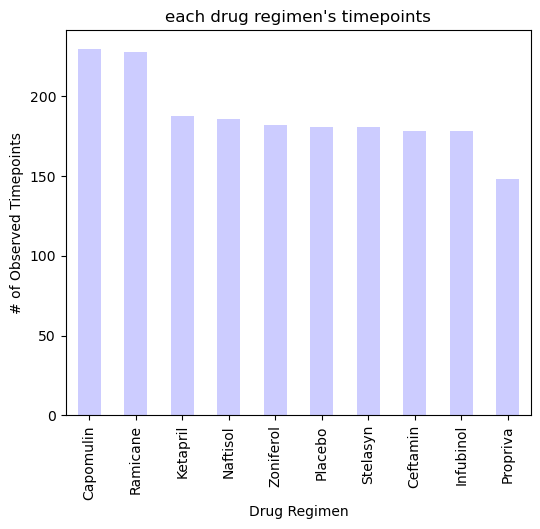

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# source: xpert
# source: sorting_data_solution.ipynb
timepointcount = groupby['Timepoint'].count()
sortedtimepointcount = timepointcount.sort_values(ascending=False)
sortedtimepointcount.plot(kind='bar', color='b', alpha=0.2, figsize=(6,5))
plt.title("each drug regimen's timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation='vertical')
plt.show()


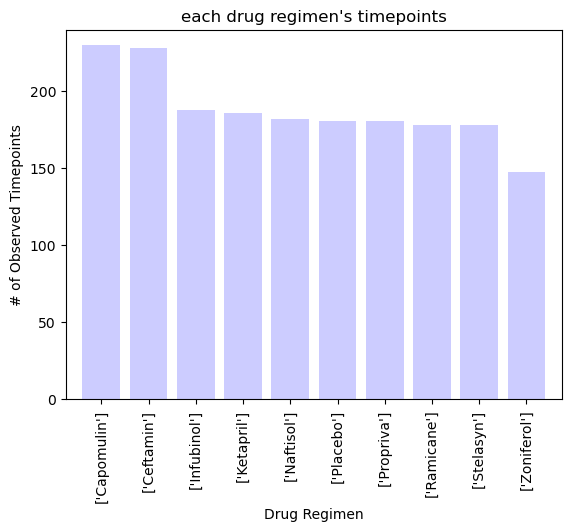

In [65]:
# dependency/import
# source: bar_chart_solution.ipynb
import numpy as np

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# source: bar_chart_solution.ipynb
# sorting_data_solution.ipynb
# source: py_bars_solution.ipynb
# source: avg_state_rain_solution.ipynb
x_axis = np.arange(len(groupby["Drug Regimen"]))
timepoint = groupby["Timepoint"].count()
sortedtimepoint = timepoint.sort_values(ascending=False)
plt.bar(x_axis, sortedtimepoint, color="b", alpha=0.2, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, groupby["Drug Regimen"].unique(), rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sortedtimepoint)+10)
plt.title("each drug regimen's timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.show()


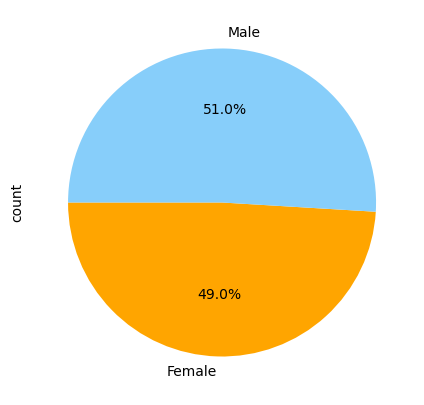

In [66]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# source: given Starter_Code

# Get the unique mice with their gender
# source: referencing previous cells above
sexgroupby = clean.groupby(["Sex"])
mouseidcount = sexgroupby["Mouse ID"].count()

# Make the pie chart
# source: xpert
mouseidcount.plot.pie(autopct="%1.1f%%", startangle=180, colors=["orange", "lightskyblue"], figsize=(5, 5), shadow=False)
plt.ylabel('count')
plt.show()


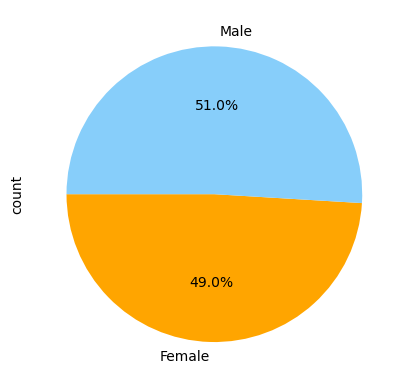

In [67]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# source: referencing previous cells above
sexgroupby = clean.groupby(["Sex"])
mouseidcount = sexgroupby["Mouse ID"].count()

# Make the pie chart
# source: pie_chart_solution.ipynb
# source: xpert
labels = ["Female", "Male"]
values = mouseidcount.values
colors = ["orange", "lightskyblue"]
explode = (0,0)
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.ylabel('count')
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# source: referencing previous cells above
# source: xpert
lasttimepoints = clean.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# source: merging_solution.ipynb
# source: xpert
# source: column_manipulation_solution.ipynb
group_df = pd.merge(clean, lasttimepoints, on="Mouse ID", how="inner")
relevantgroup_df = group_df.drop(columns=['Timepoint_x'])
renamedgroup_df = relevantgroup_df.rename(columns={"Timepoint_y":"Last Timepoint"})


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
# source: lists_solution.py
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# source: lists_solution.py
tumorvoldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# source: loop_dee_loop_solution.py
# source: xpert
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # source: xpert
    rows = renamedgroup_df.loc[renamedgroup_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # filling formerly empty list with tumor vol data (for plotting)
    # source: suggestions from rebekah
    # source: lists_solution.py
    # source: tutoring session
    tumorvoldata.append(rows)

    # add subset
    # source: samples_solution.ipynb
    # source: summary_stats_solution.ipynb
    # source: xpert
    # source: tutoring session
    quartiles = rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    subset = rows.loc[(rows < lower_bound) | 
                      (rows > upper_bound)]

    # Determine outliers using upper and lower bounds
    # source: samples_solution.ipynb
    # source: summary_stats_solution.ipynb
    # source: xpert
    # source: suggestions from rebekah
    # source: tutoring session
    print(f"{treatment}'s potential outliers: {subset}")


Capomulin's potential outliers: 1639    25.472143
1836    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1801    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


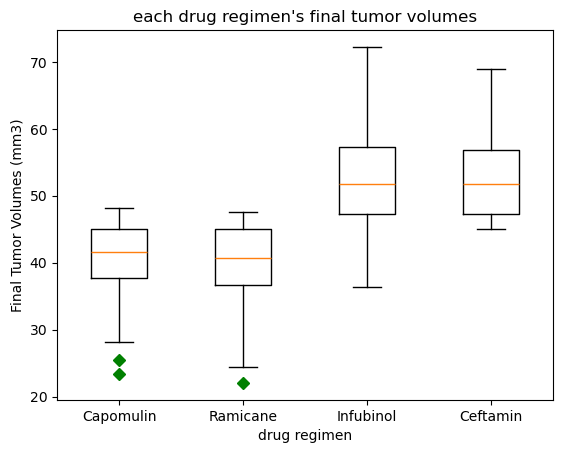

In [70]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# source: samples_solution.ipynb
# source: https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
fig1, ax1 = plt.subplots()
ax1.boxplot(tumorvoldata, 0, 'gD')
ax1.set_title("each drug regimen's final tumor volumes")
ax1.set_ylabel('Final Tumor Volumes (mm3)')
ax1.set_xlabel('drug regimen')
ax1.set_xticks(range(1, len(treatments) + 1))
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

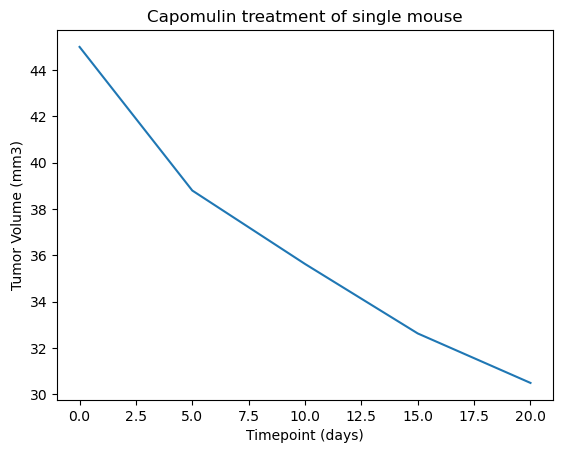

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# source: xpert
# source: standard_error_solution.ipynb
# source: coaster_speed_solution.ipynb
capomulin = clean[clean["Drug Regimen"] == treatments[0]]
singlemouse = capomulin["Mouse ID"].sample(1)
singlemousedata = capomulin[capomulin["Mouse ID"] == singlemouse.iloc[0]]
xaxis = singlemousedata["Timepoint"]
yaxis = singlemousedata["Tumor Volume (mm3)"]
lineplot = plt.plot(xaxis, yaxis)
plt.title("Capomulin treatment of single mouse")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


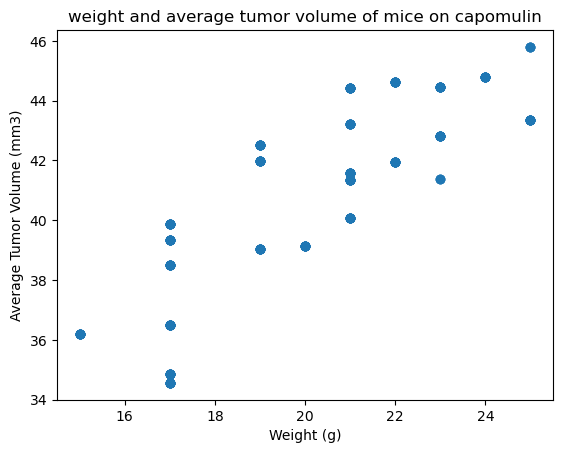

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# source: referencing previous cells above
# source: scatter_plot_solution.ipynb
avgobstumorvol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
group2_df = pd.merge(capomulin, avgobstumorvol, on="Mouse ID", how="inner")
relevantgroup2_df = group2_df.drop(columns=['Tumor Volume (mm3)_x'])
renamedgroup2_df = relevantgroup2_df.rename(columns={"Tumor Volume (mm3)_y":"Average Observed Tumor Volume"})
x_axis = renamedgroup2_df["Weight (g)"]
y_axis = renamedgroup2_df["Average Observed Tumor Volume"]
plt.scatter(x_axis, y_axis)
plt.title('weight and average tumor volume of mice on capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


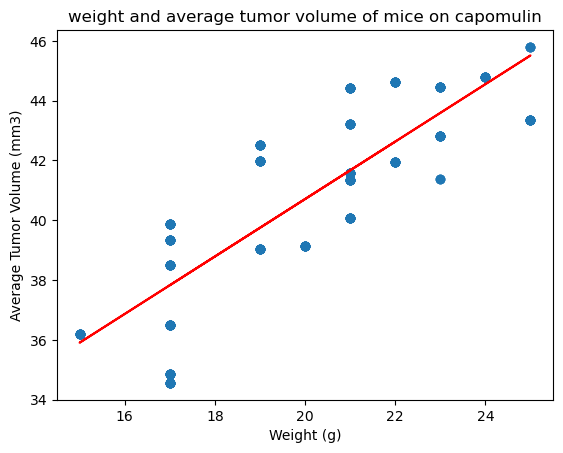

In [75]:
# dependency/import
# regression_solution.ipynb
from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# source: correlation_solution.ipynb
# source: regression_solution.ipynb
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("weight and average tumor volume of mice on capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
